# Introduction
In Part I, we retrieved the research paper's dataset and converted the .txt files to .csv. 

In this Part, we will replicate the "Data and Methods" portion of the research to the best of our ability. More specifically, you will:
1. Plot distribution of ingredients per cuisine
2. Replicate Table 1 
3. Chart the cumulative frequency distribution of the ingredient usage
4. See if Heap's Law applies to the dataset 

<font color='red'><strong>Disclaimer: some of the reproduction of the research may not resemble that you see in the paper. The UpLevel team did their utmost best to replicate the results of the study.</strong></font>

### Step 1: Import libraries
Let's start with importing the libraries
- pandas as pd
- matplotlib.pyplot as plt
- seaborn as sns
- glob
- numpy as np

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import numpy as np

### Step 2: Get a list of files in the "cuisine_recipe_ingredient_CSV" folder
In the subsequent Steps, you'll be looping through each of the CSVs in the file later on for analysis. 

As such, get a list containing the xxx.txt files in the "cuisine_recipe_ingredient_CSV" folder.

glob is useful here. 

In [2]:
# Step 2: Get a list of .CSV filenames
FileList = glob("/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/*.csv")
FileList

['/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/sucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/xibeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/yuecai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/other.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/yucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/lucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/dongbeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hubeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/qingzhencai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/jiangxicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/zhecai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuis

## Replicate "Data collection"
![DataCollection](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/DataCollection.png)

For starters, we will replicate what is mentioned in the article - that there are 8,498 recipes and 2,911 ingredients.

### Step 3: Get the total number of recipes
We'll first validate the fact that there are 8,498 recipes in the dataset. 

You will need to get the total number of unique "recipe_id" values in all of the 20 CSVs in "cuisine_reciple_ingredient".

In [3]:
# Step 3: Get the total number of recipes
RecipeLen = []

for i in FileList:
    df = pd.read_csv(i)
    RecipeLen.append(df['recipe_id'].nunique())
    
sum(RecipeLen)

8498

<details>
    <summary><strong>Click here once for pseudocode if you're stuck</strong></summary>
    <ol>
        <li>Declare a variable containing an empty list</li>
        <li>Use a for loop to loop through the filenames in the list you got from Step 2. In each loop:</li>
        <ul>
            <li>Create a DataFrame using the current loop's filename</li>
            <li>Declare a variable and get the "recipe_id" column</li>
            <li>Call .unique on the column to get the unique items in the column</li>
            <li>Get the length of the list of unique recipe_id</li>
            <li>Append the length into the list</li>
        </ul>
        <li>Sum the lengths in the list</li>
    </ol>
</details>

### Step 4: Get the total number of ingredients
We'll also get the total number of ingredients in the dataset. 

We can do this in two ways:
1. Get the number of unique items from all of the 'ingredient' columns in the CSVs
2. Get the length of the DataFrame from "component_id.txt" in the "dataset" folder 

#### Approach 1: Get the number of unique items in all CSVs
This approach is similar to Step 3, where you loop through all the CSVs and get the unique items from "ingredient" column instead of "recipe_id".

In [4]:
# Step 4 Approach 1: Get the number of unique items in "ingredient"
IngredientLen = []

for i in FileList:
    df = pd.read_csv(i)
    IngredientLen.append(df['ingredient'].nunique())
    
sum(IngredientLen)

9573

#### Approach 2: Get the length of the DataFrame from "component_id.txt"
This is both easy and hard to do, because you will encounter a problem with reading the file. 

The problem lies in the encoding of the text, which you will have to figure out. 

The <a href = "https://chardet.readthedocs.io/en/latest/usage.html">chardet</a> library will be useful for you.

In [5]:
# Step 4 Approach 2: Read component_id.txt into a DataFrame and get the DataFrame length
# "rb" mode opens the file in binary format for reading
ComId = open('/Users/sm/Desktop/CourseMaterials/dataset/component_id.txt',"rb").read()
import chardet
chardet.detect(ComId)['encoding']

'GB2312'

In [6]:
ComId = pd.DataFrame()
DecodeErrors = pd.DataFrame()

for line in open('/Users/sm/Desktop/CourseMaterials/dataset/component_id.txt',"rb"):
    try:
        l = line.decode('GB2312').split()
        ComId = ComId.append([l], ignore_index=True)
    except UnicodeDecodeError:
        encoding = chardet.detect(line)['encoding']
        if encoding:
            try:
                DecodeErrors = DecodeErrors.append([[line] + line.decode(encoding).split('\t')], ignore_index=True)
            except UnicodeDecodeError:
                DecodeErrors = DecodeErrors.append([[line] + line.decode(encoding='latin_1').split('\t')], ignore_index=True)
        else:
                DecodeErrors = DecodeErrors.append([[line] + line.decode(encoding='latin_1').split('\t')], ignore_index=True)


ComId.rename({0:'SN', 1:'Ingredient'}, axis=1, inplace=True)
print(ComId)
DecodeErrors.rename({0:'Binary', 1:'SN', 2:'Ingredient'}, axis=1, inplace=True)
print(DecodeErrors)

        SN Ingredient
0        1       北京填鸭
1        2         猪肉
2        3         冬菜
3        4         香葱
4        5        甜面酱
...    ...        ...
2866  2907       白玉豆腐
2867  2908        罐樱桃
2868  2909        盒豆腐
2869  2910         鸡蛋
2870  2911        泡椒酱

[2871 rows x 2 columns]
                                               Binary    SN        Ingredient
0                           b'98\t\xf8\x86\xd1\xaa\n'    98            ø†Ñª\n
1                              b'99\t\xb4\xf3\xc4c\n'    99            ´óÄc\n
2                     b'327\t\x8cm\xb1\xa3\xbd\xb4\n'   327          Œm±£½´\n
3                          b'731\t\xf7\x8f\xb7\xdb\n'   731            ÷·Û\n
4                     b'820\t\xc3\xab\xb6\xb9\xb9k\n'   820          Ã«¶¹¹k\n
5                          b'971\t\xf7\x84\xd3\xe3\n'   971            ч„Уг\n
6                    b'1044\t\xd0\xa1\x9dF\xb0\xfc\n'  1044          Ð¡F°ü\n
7                            b'1050\t\xe1Z\xb9\xcf\n'  1050            áZ¹Ï\n
8        

## Replicate Figure 2
In the research publication, Figure 2 contains a probability distribution of the number of ingredients per recipe.

![Figure2](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Figure2.png)

Amongst the twenty cuisines, the authors chose eight to plot. 

In this Section, you will replicate the plot.

### Step 5: Get a count for the ingredients for chuancai DataFrame
We'll start with chuancai.csv, and get the count of ingredient per recipe id. 

![ChuancaiDFIngredientCount](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/ChuancaiDFIngredientCount.png)

Again, there are several ways to do it:
1. Perform a .groupby operation on 'recipe_id' and get the count of the 'ingredient'
2. Perform a .value_counts operation on 'recipe_id'

In [7]:
# Step 5: Get a count of the ingredients per recipe_id
CC_Ingredient = pd.read_csv('/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/chuancai.csv').groupby('recipe_id').count()
CC_Ingredient.reset_index(inplace=True)
CC_Ingredient

,recipe_id,ingredient
0,0,14
1,1,11
2,2,9
3,3,10
4,4,13
...,...,...
1143,1143,18
1144,1144,7
1145,1145,10
1146,1146,7


### Step 6: Perform a distplot on the list of ingredient counts
Whichever approach you used for Step 5 was, you can use seaborn's displot method to plot your list of ingredient counts.

You will get something like this:

![ChuancaiIngredientCountDistplot](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/ChuancaiIngredientCountDistplot.png)

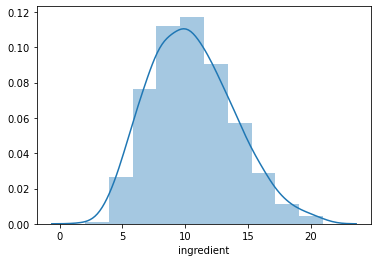

In [8]:
# Step 6: Plot a distplot on the ingredient count data
sns.distplot(CC_Ingredient['ingredient'], bins=10, kde=True)
plt.show()

### Step 7: Repeat and combine the plot together for multiple cuisines
Now that you have successfully plotted the distplot for chuancai.csv, let's repeat Steps 5-6 with the following cuisines:
- lucai.csv
- chuancai.csv
- yuecai.csv
- sucai.csv
- mincai.csv
- zhecai.csv
- xiangcai.csv
- huicai.csv

You won't be able to use the list from Step 2, so you'll have to declare a new list with these files in order. Use the list from Step 2 to copy and paste the full paths. 

Don't forget to put hist=False when you plot the distplot so the resultant plot resembles Figure 2.

In [9]:
# Step 7a: Declare a new list containing the filenames
FileNames2 = ['/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/lucai.csv',
'/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/chuancai.csv',
'/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/yuecai.csv',
'/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/sucai.csv',
'/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/mincai.csv',
'/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/zhecai.csv',
'/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/xiangcai.csv',
'/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hucai.csv']

labels=['Lu','Chuan','Yue','Su','Min','Zhe','Xiang','Hui']

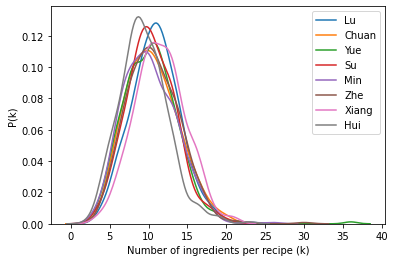

In [10]:
# Step 7b: Loop through the list and plot the distplots on the same plot
for i in range(len(FileNames2)):
    Freq = pd.read_csv(FileNames2[i]).groupby('recipe_id').count()
    Freq.reset_index(inplace=True)
    g = sns.distplot(Freq['ingredient'], bins=10, kde=True, hist=False, label=labels[i])
    g.set(ylabel = 'P(k)', xlabel = 'Number of ingredients per recipe (k)')

plt.legend()
plt.show()

<details>
    <summary><strong>Click here once to see what we got</strong></summary>
    <img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Figure2Replicated.png">
</details>

<details>
    <summary><strong>Click here once for pseudocode</strong></summary>
    <ol>
        <li>Use a for loop to loop through the list of filenames you declared in Step 7a. In each loop:</li>
        <ul>
            <li>Create a temporary DataFrame of the currenct filename</li>
            <li>Get the 'recipe_id' column and assign it to a variable</li>
            <li>Call a .distplot with the column, and don't forget to put hist=False</li>
        </ul>
    </ol>
</details>

## Replicate Table 1
Once we have replicated Figure 2 successfully, let's take a look at the next thing to replicate - Table 1.

![Table1](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Table1.png)

Table 1 has four columns:

<font color='red'>$N_{r}$</font> = number of recipes

<font color='green'>$N_{i}$</font> = number of ingredients

<font color='blue'>$\hat{N}_{i}$</font> = number of ingredients used only in the cuisine

<font color='purple'><$K$\></font> = average number of ingredients in a recipe
    
If this Section looks intimidating, please do not worry - you actually have figured out the way to get these numbers based on your work in Steps 3-7.
    
We'll start with getting the four lists, and then building a DataFrame out of the lists to replicate Table 1. 

### Step 8: Get the list of number of recipes for cuisines <font color='red'>$N_{r}$</font>
In this Step, we'll count how many recipes there are in each cuisine, storing them as a single list. 

Loop through the full list of CSVs that you got from Step 2 and append the number of unique recipes into a list. 

Don't sweat it - you've done this for Step 3 before but this time you do not sum the numbers in the list.

In [11]:
# Step 8: Get the list of number of recipes per cuisine
RecipeCount = []

for i in FileList:
    df = pd.read_csv(i)
    RecipeCount.append(df['recipe_id'].nunique())
    
RecipeCount

[372,
 188,
 775,
 52,
 173,
 1066,
 358,
 160,
 521,
 143,
 460,
 744,
 125,
 606,
 468,
 218,
 691,
 1148,
 79,
 151]

### Step 9: Get the list of number of ingredients for cuisines <font color='green'>$N_{i}$</font>
In this Step, we'll count how many unique ingredients there are for cuisines, storing them as a single list as well.

Similar to Step 8, loop through the list of CSV filenames and append the number of ingredients into a list.

In [12]:
# Step 9: Get the list of number of ingredients per cuisine
IngredientCount = []

for i in FileList:
    df = pd.read_csv(i)
    IngredientCount.append(df['ingredient'].nunique())
    
IngredientCount

[573,
 338,
 900,
 171,
 291,
 788,
 458,
 266,
 426,
 210,
 594,
 692,
 191,
 565,
 648,
 442,
 592,
 877,
 184,
 367]

### Step 10: Get the unique number of ingredients in each cuisine <font color='blue'>$\hat{N}_{i}$</font>
In this Step, we identify how many ingredients are unique to each cuisine alone. 

To illustrate this, we can take a look at the Venn diagram below:

![UniqueIngredients](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/UniqueIngredients.png)

There are a few ways to get the number of unique items per cuisine. 

That said, we recommend implementing <a href="https://stackoverflow.com/questions/17035577/unique-features-between-multiple-lists">this code</a> and modifying it for this specific use case.

In [13]:
# Step 10: Get the number of unique ingredients in each cuisine
UniqueIn = []

for i in FileList:
    df = pd.read_csv(i)
    UniqueIn.append(list(df['ingredient'].unique()))
    
UniqueIn

[[250,
  143,
  165,
  359,
  286,
  14,
  102,
  181,
  4,
  263,
  12,
  21,
  55,
  318,
  91,
  37,
  13,
  2273,
  97,
  2274,
  40,
  43,
  437,
  25,
  860,
  17,
  427,
  280,
  28,
  419,
  20,
  2,
  46,
  147,
  174,
  44,
  19,
  36,
  11,
  22,
  33,
  117,
  624,
  530,
  264,
  10,
  134,
  1151,
  34,
  2275,
  2276,
  163,
  62,
  881,
  60,
  129,
  553,
  45,
  1437,
  114,
  268,
  113,
  928,
  58,
  53,
  54,
  505,
  116,
  432,
  237,
  324,
  75,
  2277,
  281,
  847,
  1111,
  2278,
  523,
  757,
  2279,
  701,
  167,
  2280,
  24,
  77,
  16,
  1537,
  48,
  93,
  672,
  1325,
  1482,
  285,
  173,
  205,
  852,
  2037,
  1612,
  177,
  888,
  171,
  401,
  2281,
  675,
  2282,
  196,
  379,
  320,
  51,
  755,
  203,
  216,
  256,
  2283,
  287,
  2284,
  1849,
  128,
  106,
  2285,
  464,
  2046,
  2286,
  119,
  354,
  145,
  450,
  347,
  924,
  390,
  47,
  153,
  146,
  438,
  186,
  3,
  187,
  664,
  5,
  383,
  206,
  94,
  7,
  2287,
  789,
  292,
 

In [14]:
def f(lol):
  return [len(set(lol[i]).difference(*lol[:i], *lol[i+1:])) for i in range(len(lol))]
UniqueCount = f(UniqueIn)
UniqueCount

[115,
 23,
 210,
 7,
 23,
 195,
 64,
 16,
 52,
 5,
 111,
 131,
 10,
 88,
 117,
 74,
 87,
 237,
 14,
 69]

<details>
    <summary><strong>Click here once for pseudocode</strong></summary>
    <ol>
        <li>Create a list containing lists of unique ingredients in each cuisine</li>
        <li>Declare an empty list to store the length of unique ingredients in each cuisine</li>
        <li>Copy and paste the code from the best Stackoverflow answer in the URL</li>
        <li>Replace [A_1, A_2, A_3] with your list of lists for the variable <strong>all_lists</strong></li>
        <li>Replace (A_1, A_2, A_3) with your list of lists for the for loop</li>
        <li>Replace print(sorted(uniques)) with appending the length of <strong>sorted(uniques)</strong> into the empty list above</li>
    </ol>
</details>

### Step 11: Get the mean number of ingredients per cuisine <font color='purple'><\$K$\></font>
In this Step, we will get the mean number of ingredients per cuisine by:
1. Performing a groupby operation on the recipe_id and counting the ingredients
2. Getting the mean of the 'ingredient' column
3. Append the mean to a list
    
![AverageIngredientPerCuisineExample](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/AverageIngredientPerCuisineExample.png)
    
In this case, averaging the ingredient count of chuancai cuisine will yield 10.512.

In [15]:
# Step 11: Get the list containing the average ingredient per recipe in each cuisine
from statistics import mean

AvgIn = []

for i in FileList:
    df = pd.read_csv(i)
    AvgIn.append(df.groupby('recipe_id')['ingredient'].count().mean())

AvgIn

[10.35483870967742,
 10.845744680851064,
 10.303225806451612,
 9.596153846153847,
 10.705202312138729,
 10.883677298311445,
 10.061452513966481,
 10.76875,
 10.75623800383877,
 10.328671328671328,
 10.610869565217392,
 9.448924731182796,
 11.512,
 10.376237623762377,
 10.198717948717949,
 9.908256880733944,
 11.48480463096961,
 10.512195121951219,
 8.822784810126583,
 9.417218543046358]

In [16]:
FileList

['/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/sucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/xibeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/yuecai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/other.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/yucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/lucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/dongbeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hubeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/qingzhencai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/jiangxicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/zhecai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuis

In [17]:
[i.replace("/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/","") for i in FileList]

['sucai.csv',
 'xibeicai.csv',
 'yuecai.csv',
 'other.csv',
 'yucai.csv',
 'lucai.csv',
 'dongbeicai.csv',
 'hubeicai.csv',
 'qingzhencai.csv',
 'jiangxicai.csv',
 'zhecai.csv',
 'hucai.csv',
 'shanxicai.csv',
 'jingcai.csv',
 'mincai.csv',
 'huicai.csv',
 'xiangcai.csv',
 'chuancai.csv',
 'yunguicai.csv',
 'gangtai.csv']

### Step 12: Put the lists into a DataFrame
Now that you have obtained all four lists, it's time to create Table 1.

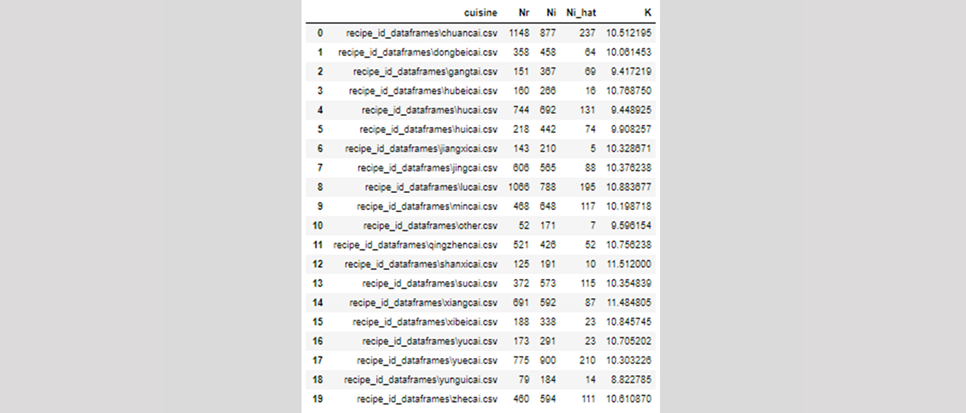

In [18]:
# Step 12: Recreate Table 1 as DataFrame
Table1 = pd.DataFrame({'cuisine':[i.replace("/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/","") for i in FileList],
              'Nr':RecipeCount, 
              'Ni':IngredientCount, 
              'Ni_hat':UniqueCount, 
              'K':AvgIn})
Table1

,cuisine,Nr,Ni,Ni_hat,K
0,sucai.csv,372,573,115,10.354839
1,xibeicai.csv,188,338,23,10.845745
2,yuecai.csv,775,900,210,10.303226
3,other.csv,52,171,7,9.596154
4,yucai.csv,173,291,23,10.705202
5,lucai.csv,1066,788,195,10.883677
6,dongbeicai.csv,358,458,64,10.061453
7,hubeicai.csv,160,266,16,10.768750
8,qingzhencai.csv,521,426,52,10.756238
9,jiangxicai.csv,143,210,5,10.328671


### Step 13: Reorder the rows in the DataFrame
If you used the list from Step 2, you'll notice that the order of the cuisines is not the same as the original Table 1. 

Reorder the rows using .reindex so that you can match Table 1. 

Note that Muslim in Table 1 is qingzhen, HK is gangtai.

What do you notice about the DataFrame after reordering the rows?

In [19]:
# Step 13: Rearrange the rows of the DataFrame from Step 12
sorted_cuisine = pd.DataFrame({'cuis':['chuancai.csv','dongbeicai.csv','gangtai.csv',
                  'hubeicai.csv','hucai.csv','huicai.csv',
                  'jiangxicai.csv','jingcai.csv','lucai.csv',
                  'mincai.csv','other.csv','qingzhencai.csv',
                  'shanxicai.csv','sucai.csv','xiangcai.csv',
                  'xibeicai.csv','yucai.csv','yuecai.csv',
                  'yunguicai.csv','zhecai.csv']})
sorted_cuisine = sorted_cuisine.reset_index().set_index('cuis')

In [20]:
Table1['sorting'] = Table1['cuisine'].map(sorted_cuisine['index'])
Table1 = Table1.sort_values('sorting').reset_index(drop=True).drop(['sorting'], axis=1)
Table1

,cuisine,Nr,Ni,Ni_hat,K
0,chuancai.csv,1148,877,237,10.512195
1,dongbeicai.csv,358,458,64,10.061453
2,gangtai.csv,151,367,69,9.417219
3,hubeicai.csv,160,266,16,10.768750
4,hucai.csv,744,692,131,9.448925
5,huicai.csv,218,442,74,9.908257
6,jiangxicai.csv,143,210,5,10.328671
7,jingcai.csv,606,565,88,10.376238
8,lucai.csv,1066,788,195,10.883677
9,mincai.csv,468,648,117,10.198718


<details>
    <summary><strong>Click here once to see what we noticed</strong></summary>
    <img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Table1Comparison.png">
    <br>
    <div>It seems like our Table looks identical for <font color='red'>$N_{r}$</font> and <font color='green'>$N_{i}$</font>, but not the rest. <font color='blue'>$\hat{N}_{i}$</font> seems to be mixed up and <font color='purple'><$K$></font> should be similar between the two tables. We double checked on our side for any possible errors, and it seems that our sums should be correct. No big deal, no worries.</div>
</details>

## Replicate Figure 3
Figure 3 is the cumulative frequency distribution ingredient usage. 

![CumulativeFrequencyDistribution](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/CumulativeFrequencyDistribution.png)

Based on the paper, the distribution of ingredients follow a power law which results in a somewhat straight line in the plot. We'll examine whether this claim is true by replicating the figure.

<font color='red'>Note: Bear in mind that we won't be able to replicate this image exactly, because of unforeseen factors and the fact that the project was executed in MATLAB</font>

### Step 14: Install and import powerlaw
To draw a cumulative frequency plot, we'll need to use the powerlaw library. 

Go ahead and install and import powerlaw.

More details here: https://github.com/jeffalstott/powerlaw

In [22]:
import powerlaw

### Step 15: Get the frequency of every single ingredient
Before we can plot the frequency distribution, we need to know how many times each ingredient id appears in ALL of the cuisines.

There are many ways to get the frequency, and here are some suggestions on what to do after getting the list of ingredients from all cuisines:
1. Create a Counter object using the list, followed by a DataFrame using the Counter object's keys and values
2. Create DataFrame using the list of ingredients, followed by a .value_counts() operation

![GettingIngredientValueCount](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/GettingIngredientValueCount.png)

In [38]:
# Step 15: Get the frequency of every single ingredient
from collections import Counter
IngredientId = []

for i in FileList:
    df = pd.read_csv(i)
    IngredientId+=list(df['ingredient'])
    
IngredientCount = Counter(IngredientId)
IngredientCount

Counter({250: 17,
         143: 19,
         165: 44,
         359: 20,
         286: 28,
         14: 4840,
         102: 1784,
         181: 149,
         4: 5094,
         263: 24,
         12: 6821,
         21: 2261,
         55: 1215,
         318: 221,
         91: 3486,
         37: 540,
         13: 4906,
         2273: 1,
         97: 30,
         2274: 1,
         40: 334,
         43: 689,
         437: 485,
         25: 1013,
         860: 11,
         17: 876,
         427: 358,
         280: 533,
         28: 505,
         419: 15,
         20: 1470,
         2: 679,
         46: 213,
         147: 84,
         174: 260,
         44: 948,
         19: 2248,
         36: 802,
         11: 2955,
         22: 3133,
         33: 2390,
         117: 105,
         624: 6,
         530: 51,
         264: 167,
         10: 2762,
         134: 165,
         1151: 50,
         34: 372,
         2275: 4,
         2276: 1,
         163: 165,
         62: 161,
         881: 27,
     

In [43]:
IngredientFreq = pd.DataFrame({'id':IngredientCount.keys(), 'frequency':IngredientCount.values()}).sort_values(by=['frequency', 'id'], ascending=[False, True])
IngredientFreq

,id,frequency
10,12,6821
8,4,5094
16,13,4906
5,14,4840
14,91,3486
...,...,...
1991,2907,1
1992,2908,1
1993,2909,1
1994,2910,1


### Step 16: Plot the ingredient frequency distribution
Now that you have the counts of the ingredients, let's plot the frequency distribution using the powerlaw library.

Implement the code that you see in https://nbviewer.jupyter.org/github/jeffalstott/powerlaw/blob/master/manuscript/Manuscript_Code.ipynb

More specifically, we can use the code in the <strong>code cell directly after "PDF Linear vs Logarithmic Bins"</strong>.

Don't worry if your plot is different from the paper's.

<details>
    <summary><strong>Click once to see what we have</strong></summary>
    <img src="https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/PowerLawPlot.png">
    <br>
    <div>Looks like it's a straight line plot, and the frequency of our ingredients follow a power law.</div>
</details>

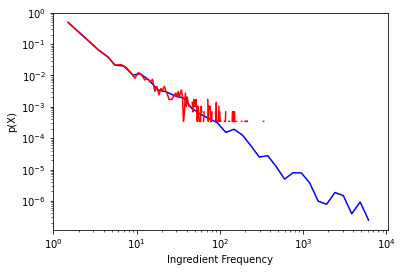

In [51]:
# Step 16: Plot the power law plot
figPDF = powerlaw.plot_pdf(IngredientFreq['frequency'], color='b')
powerlaw.plot_pdf(IngredientFreq['frequency'], linear_bins=True, color='r', ax=figPDF)
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Ingredient Frequency")
plt.show()

### Step 17: Export the frequency count as CSV
We'll need the frequency count later in Part IV where we will create a simulation for ingredient evolution.

The frequency count that we obtained from Step 15 - be it a DataFrame or Series - should be exported into CSV.

In [53]:
# Step 17: Export the ingredient frequency count as CSV
IngredientFreq.to_csv('IngredientFreq v0.1.csv', index=None)

In [26]:
# Optional: Use pandas to read the exported CSV to make sure you got the export right

## Replicate Figure 4
Figure 4 shows the number of distinct ingredients discovered vs the number of recipes scanned. 

![Figure4](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Figure4.png)

Intuitively, as we go through more and more recipes, we should expect to encounter fewer and fewer new ingredients.

As such, consider this:
1. x-axis: cumulative number of ingredients
2. y-axis: number of unique ingredients

The article mentions the averaging of 100 implementations of "independently random sequences" of recipes. We're unable to ascertain what that means, so we will just with using the entire dataset to construct Figure 4.

### Step 18: Create lists for Figure 4
As mentioned, we'll need to create two lists:
1. x-axis: cumulative number of ingredients
2. y-axis: number of unique ingredients

You'll have to loop through each ingredient in all of the recipes in all cuisines (a list of 88,929 items), and in each loop you have to keep track of:
- how many ingredients have you looped through
- whether the ingredient in the current loop is new 

<details>
    <summary><strong>Click here once for pseudocode</strong></summary>
    <ol>
        <li>Declare an empty list to store number of ingredients(List_1)</li>
        <li>Declare an empty list to store number of unique ingredients (List_2)</li>
        <li>Declare a variable that is an empty set (Set_1)</li>
        <li>Declare a variable that contains the sum of ingredients (Var_1)</li>
        <li>Use a for loop to loop through the combined list of ingredient items from all cuisines (88,929 items). In each loop:</li>
        <ul>
            <li>Increase the value of Var_1 by 1</li>
            <li>Append Var_1 into List_1</li>
            <li>Add the current loop's ingredient into Set_1 with .add</li>
            <li>Append the length of Set_1 into List_2</li>
        </ul>
    </ol>
</details>

In [58]:
# Step 18: Create the lists for Figure 4
List_1 = []
List_2 = []
Set_1 = set()
Var_1 = 0

for i in IngredientId:
    Var_1 +=1
    List_1.append(Var_1)
    Set_1.add(i)
    List_2.append(len(Set_1))

### Step 19: Create a line of best fit between the two lists
Before we recreate Figure 4 with the two lists from Step 17, we'll need to create a line of best fit between them. 

We'll be doing a log y vs log x fit, more specifically

$\ log(y) = m\cdot log(x) + c $

where $m $ is the gradient and $c$ is the y-intercept.

Use numpy's polyfit function fit the two log-transformed lists with a degree of 1, and get m and c.

After that, generate a list of values y_fit using $m$ and $c$, where 

$\ y\_fit = e^{m\cdot log(x) + c}$

Gentle reminder - x is List 1 from Step 17.

In [67]:
# Step 19a: Get m and c from np.polyfit
log_x = np.log(List_1)
log_y = np.log(List_2)
coeff = np.polyfit(x = log_x, y = log_y, deg=1)
coeff

array([0.5136041, 2.1179284])

In [91]:
# Step 19b: Create y_fit values
p = np.poly1d(coeff)
y_fit = np.exp(p(log_x))
y_fit

array([   8.31389655,   11.86901986,   14.61692603, ..., 2895.00013303,
       2895.01685326, 2895.03357339])

### Step 20: Plot the log-log plot with the line of best fit
Now that you have the line of best fit, plot both the log-log along with the line of best fit. 

You'll have to figure out how to transform the scales of the x- and y-axes to be in log scale.

If all goes well, you should see a plot like this.

![LogLogWithBestFitLine](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/LogLogWithBestFitLine.png)

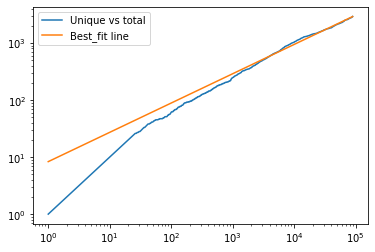

In [93]:
# Step 20: Plot the figure
plt.yscale("log")
plt.xscale("log")
sns.lineplot(x=List_1, y=List_2, label = "Unique vs total")
sns.lineplot(x=List_1, y=y_fit, label = 'Best_fit line')
plt.legend()
plt.show()

<details>
    <summary><strong>Is the line of best fit legit? Click once to see whether it is</strong></summary>
    <div>Yes it is! Let's take a different look at our plot, without the log scale</div>
    <img src = "https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/LogLogWithBestFitLineNormalScale.png">
    <br>
    <div><p>If you plot the graph without changing the axes' scale to log scale, you'll see that the curve that you generated fits the actual values pretty while.</p><p>It only looks like the lines do not align in the log-scale plot because of the log scale, which makes differences look big at the smaller quantities, i.e 10^1 to 10^2.</p></div>
</details>

### End of Part II
Wow, what a part. In this Part, you have successfully replicated, to a certain extent, the Tables and Figures found in the "Data and Methods" part in the research paper. 

More specifically, you:
1. Plotted probability distribution of number of ingredients per recipe for selected cuisines
2. Calculated basic statistics of the various cuisines, and compiled the results into a Table
3. Plotted a cumulative frequency distribution of ingredient usage in recipes
4. Plotted a log-log plot of the number of distinct ingredients vs number of ingredients in total

Next Part, we'll continue and replicate the results in the "Results" section of the research paper.